##### 뉴스가 주가에 미치는 영향 요약
- 데이터 : 주가, 뉴스본문
- 가설 : 주가 변동이 큰 종목일수록, 이슈가 되는 원인이 있기 마련이다. 뉴스에서 언급되는 종목 이슈가 있다면 주가에 영향을 줄 것이고, 반대로 주가에 큰 변동이 있었던 종목일수록 그 원인과 관련한 뉴스가 많이 보도될 수 있다.
- 예상되는 결과 : 
    - 뉴스에 많이 언급될수록 주가가 큰 폭으로 움직인다. 
    - 주가가 큰 폭으로 움직였던 종목일수록, 이에 대한 기사가 많이 나올 것이다.
- 행동계획 : 주가 변동의 원인에 대해 관련 뉴스를 요약한 결과를 통해 빠르게 파악한다.


# 확인할 종목 선정

* 종목 선정 기준
    - 상승 종목 리스트의 상승률 상위 10개
* 수집 방법
    - '금융홈 > 국내증시 > 상승' 페이지에서 종목코드와 종목명 크롤링
    - http://finance.naver.com/sise/sise_rise.nhn

# 뉴스 스크랩
* 고도화 포인트
    - 뉴스를 좀 더 많이 수집
    - 단어 리스트에서 종목명, 상투적인 단어 등을 제거하고 이슈에 관한 키워드를 최대한 남길 수 있도록 고도화

In [321]:
import requests
import lxml.html
from urllib.parse import urljoin

In [322]:
board_url = 'http://finance.naver.com/item/news_news.nhn?code=035720&page=1'
response = requests.get(board_url)

In [323]:
response.content.decode('euckr')

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<html lang="ko">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\r\n<title>네이버 금융</title>\r\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/newstock.css?20160519105849">\r\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/common.css?20160519105849">\r\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/layout.css?20160519105849">\r\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/main.css?20160519105849">\r\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/newstock2.css?20160519105849">\r\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/newstock3.css?20160519105849">\r\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/world.css?20160519105849">\r\n</head>\r\n<body>\r\n<script language="JavaScript">\r\nfunction mouseOver(obj){\r\n  obj.style.backg

In [406]:
root = lxml.html.fromstring(response.content)
f = open('news_scrap.txt', 'w', encoding='utf8')

In [407]:
root.xpath('/html/body/table[1]/tr/td[@class="title"]')[0].text_content()

"구글, 음성인식 AI 개인비서 '구글 어시스턴트' 공개"

In [408]:


for node in root.xpath('/html/body/table[1]/tr/td[@class="title"]/a'):


    # 게시물 리스트 제목 출력
    print(node.text_content())
    f.write(node.text_content())
    
    # 게시물 본문 URL
    article_url = urljoin(board_url, node.attrib['href'])
    print(article_url)
    print()
    
    # 게시물 본문 조회 및 출력
    root_article = lxml.html.fromstring(requests.get(article_url).content)
    main_text = root_article.xpath('//*[@id="news_read"]/div[1]')[0].text_content() #<div class="detailnews">
    print(main_text)
    print('━'*30)
    
    # text file
    f.write(main_text)
    f.write('\n')
    f.write('━'*30)
    f.write('\n')



구글, 음성인식 AI 개인비서 '구글 어시스턴트' 공개
http://finance.naver.com/item/news_read.nhn?article_id=0003650990&office_id=014&code=035720&page=1

 
   
    
     
      
       
        
         
          
           
            
           
          
          
       
      
     인공지능(AI)과 사물인터넷(IoT)을 결합한 개인비서 서비스를 놓고 세계전쟁이 본격화되고 있다.IoT 칩이 내장된 집안을 AI비서가 사용자의 명령을 받아 모두 수행하는 것이다. 이를테면 사용자가 "비가 오는데 분위기 좀 맞춰줘"라고 요구하면 AI비서는 집안의 조명을 낮추고 분위기에 맞는 음악을 틀어주는 것은 물론 따뜻한 커피도 내린다.특히 구글이 AI 개인비서의 스마트홈 서비스를 올 하반기 상용화하겠다고 발표하면서 AI와 IoT를 결합한 개인비서 서비스 시장이 본격 형성될 것으로 예상된다. AI기술력에서 뒤져 있는 국내 업체들도 경쟁에 대응해야 한다는 목소리가 높아지고 있다.■AI, IoT 만나 똑똑한 개인비서순다르 피차이 구글 최고경영자(CEO)는 18일 (현지시간) 구글 연례 개발자 회의 '구글 I/O 2016'의 개막 기조연설에서 대화형 음성비서 '구글 어시스턴트'를 공개했다.'구글 어시스턴트'는 사용자의 음성을 인식해 질문을 이해하고, 식당 예약을 비롯해 예약 변경, 스케줄 조회, 메시지 전송 등을 비서가 맡아야 하는 기능을 실제 수행해냈다. 특히 구글 I/O현장에서 '구글 어시스턴트'는 사용자 질문의 문맥을 이해해 특정하지 않아도 스스로 관련 대답을 도출했다.피차이 CEO가 시연을 통해 '구글 어시스턴트'에게 "영화 레버넌트의 감독은 누구지?"라고 묻자 '구글 어시스턴트'는 "알레한드로 곤살레스 이냐리투"라고 답했다. 이어 "그가 어떤 상을 받았지?"라는 질문에 이냐리투 

In [409]:
f.close()

# 뉴스 저장 파일 읽어오기

In [506]:
import csv

news = []
with open('news_scrap.txt', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

# 형태소 분석기 load

In [507]:
from konlpy.tag import Kkma
from sklearn.feature_extraction.text import CountVectorizer

tagger = Kkma()
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [508]:
tdf = cv.fit_transform(news)
tdf

<36x50 sparse matrix of type '<class 'numpy.int64'>'
	with 64 stored elements in Compressed Sparse Row format>

# Term-Document Matrix 만들기

In [509]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)
tdf = cv.fit_transform(news)

In [510]:
tdf

<36x50 sparse matrix of type '<class 'numpy.int64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [511]:
tdf.todense() # 화면에 표현 가능하도록 형태 변환

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [512]:
words = cv.get_feature_names()
words.remove('카카오')
words

['9.95',
 '9.95포인트',
 'ㆍ',
 '개인',
 '개인비서',
 '게임',
 '결합',
 '경쟁',
 '공정위',
 '과',
 '구',
 '구글',
 '글',
 '비서',
 '서비스',
 '세계전',
 '스마트',
 '시장',
 '업체',
 '에베레스트',
 '예상',
 '올',
 '요구',
 '을',
 '음악',
 '인공',
 '인공지능',
 '인터넷',
 '인터넷ㆍ게임',
 '저널리즘',
 '전',
 '전쟁',
 '조명',
 '지능',
 '집안',
 '칩',
 '커피',
 '코스',
 '코스닥',
 '코스피',
 '투',
 '파이낸셜',
 '파이낸셜뉴스',
 '포인트',
 '피',
 '하나',
 '하나금투',
 '하락',
 '하반기']

# 한 글자 짜리 단어 빼기

In [513]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [514]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)
tdf = cv.fit_transform(news)
words = cv.get_feature_names()

In [515]:
words.remove('카카오')

# 단어별 출현 빈도

In [516]:
import numpy

In [517]:
count_mat = tdf.sum(axis=0)

In [518]:
count_mat

matrix([[1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]], dtype=int64)

In [519]:
count = numpy.squeeze(numpy.asarray(count_mat))
# squeeze : 표를 평평하게 만듦. [[]] => []
count

array([1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [520]:
word_count = list(zip(words, count))
word_count

[('9.95', 1),
 ('9.95포인트', 1),
 ('개인', 2),
 ('개인비서', 2),
 ('게임', 1),
 ('결합', 2),
 ('경쟁', 1),
 ('공정위', 1),
 ('구글', 3),
 ('국내', 1),
 ('기술력', 1),
 ('내장', 1),
 ('뉴스', 1),
 ('대응', 1),
 ('드라이버', 1),
 ('로봇', 1),
 ('로봇저널리즘', 1),
 ('비서', 2),
 ('서비스', 2),
 ('세계', 1),
 ('세계전', 1),
 ('수행', 1),
 ('스마트', 1),
 ('스마트홈', 1),
 ('시장', 1),
 ('업체', 1),
 ('에베레스트', 1),
 ('예상', 1),
 ('요구', 1),
 ('음악', 1),
 ('인공', 1),
 ('인공지능', 1),
 ('인터넷', 2),
 ('인터넷ㆍ게임', 1),
 ('저널리즘', 1),
 ('전쟁', 1),
 ('조명', 1),
 ('지능', 1),
 ('집안', 1),
 ('커피', 3),
 ('코스', 1),
 ('코스닥', 1),
 ('코스피', 1),
 ('파이낸셜', 1),
 ('파이낸셜뉴스', 1),
 ('포인트', 1),
 ('하나', 1),
 ('하나금투', 1),
 ('하락', 1)]

# 단어 빈도순 정렬

In [521]:
import operator

In [522]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('구글', 3),
 ('커피', 3),
 ('개인', 2),
 ('개인비서', 2),
 ('결합', 2),
 ('비서', 2),
 ('서비스', 2),
 ('인터넷', 2),
 ('9.95', 1),
 ('9.95포인트', 1),
 ('게임', 1),
 ('경쟁', 1),
 ('공정위', 1),
 ('국내', 1),
 ('기술력', 1),
 ('내장', 1),
 ('뉴스', 1),
 ('대응', 1),
 ('드라이버', 1),
 ('로봇', 1),
 ('로봇저널리즘', 1),
 ('세계', 1),
 ('세계전', 1),
 ('수행', 1),
 ('스마트', 1),
 ('스마트홈', 1),
 ('시장', 1),
 ('업체', 1),
 ('에베레스트', 1),
 ('예상', 1),
 ('요구', 1),
 ('음악', 1),
 ('인공', 1),
 ('인공지능', 1),
 ('인터넷ㆍ게임', 1),
 ('저널리즘', 1),
 ('전쟁', 1),
 ('조명', 1),
 ('지능', 1),
 ('집안', 1),
 ('코스', 1),
 ('코스닥', 1),
 ('코스피', 1),
 ('파이낸셜', 1),
 ('파이낸셜뉴스', 1),
 ('포인트', 1),
 ('하나', 1),
 ('하나금투', 1),
 ('하락', 1)]

# 워드 클라우드

In [523]:
%matplotlib inline
from wordcloud import WordCloud
from matplotlib import pyplot

In [524]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

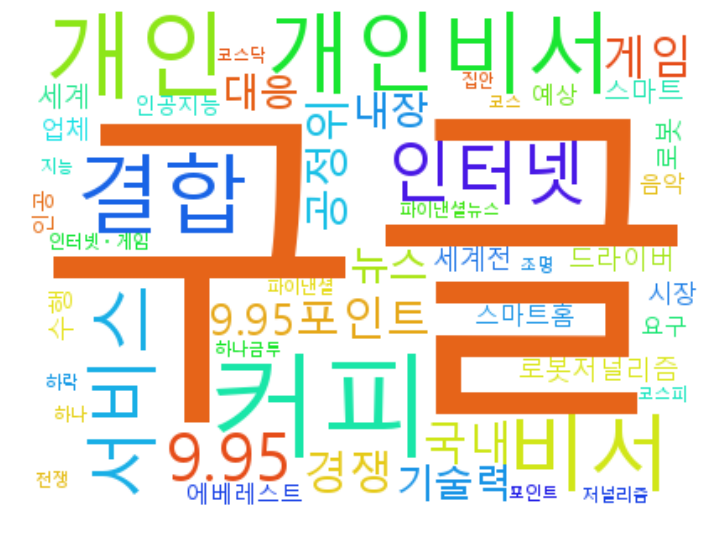

In [525]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

# 단어간 상관계수

In [526]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

# 상관관계 높은 순으로 일부 추출

In [537]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

In [538]:
# 상관계수 높은 순으로 정렬
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:25]
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

# 상관관계 시각화

In [539]:
import networkx

In [540]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

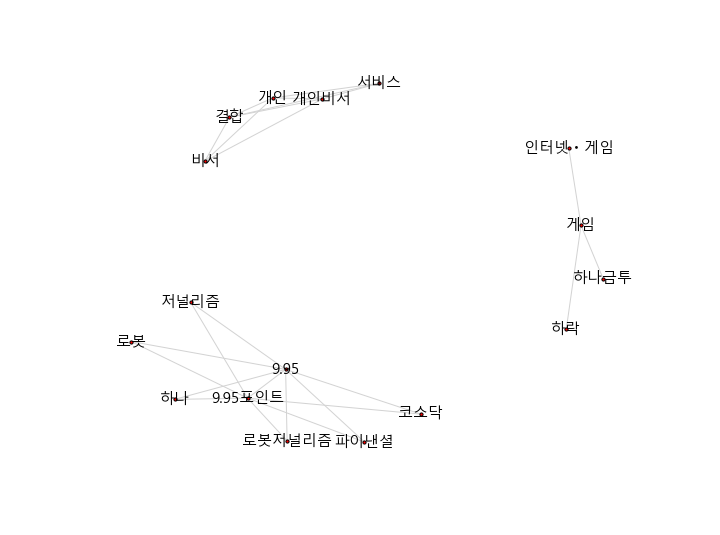

In [541]:
position = networkx.spring_layout(G, iterations=30) #좌표 계산, 여러가지 레이아웃과 좌표 강제 지정 등의 방법이 있음
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=10)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()